In [3]:
from transformers import Trainer, BartTokenizer

In [4]:
import pandas as pd
import numpy as np

In [21]:
def clean_text(text):
    text = text.replace("<br/>", "")
    text = text.replace("<br>", "")
    text = text.repace("\xa0", "")
    text = text.replace("•", "")
    text = text.replace("&#39;", "'")
    text = text.replace(" +", " ")
    text = text.replace("\n", "")
    clean_exprs = ["HEIGHT OF MODEL", "height of model", "model height", "MODEL HEIGHT", "Contains: "]
    for expr in clean_exprs:
        if expr in text:
            text = text[:text.find(expr)]
    return text

In [5]:
def clean_text(text):
    text = text.replace("<br/>", "")
    text = text.replace("<br>", "")
    text = text.replace("\xa0", "")
    text = text.replace("•", "")
    text = text.replace("&#39;", "'")
    text = text.replace("\n", "")
    clean_exprs = [
        "HEIGHT OF MODEL",
        "height of model",
        "model height",
        "MODEL HEIGHT",
        "Contains: ",
        "Heel height",
        "Sole height",
        "Height of sole",
        "Height x Length x Width",
        "WARNING",
    ]
    for expr in clean_exprs:
        if expr in text:
            text = text[: text.find(expr)]
    text = text.replace(" +", " ")
    return text

In [6]:
df = pd.read_csv("../train.csv")

In [7]:
test = pd.read_csv("../test_descriptions.csv")

In [48]:
test2 = pd.read_csv("../test_descriptions.csv")

In [55]:
[text for text in test2["description"].tolist() if "Height x Length" in text]

['Giraffe-shaped crossbody bag. Zip closure and a mini giraffe-shaped decorative accessory. Shoulder strap. Fabric lining.<br/><br/>Height x Length x Width: 25 x 12 x 10 cm. / 9.8 x 4.7 x 3.9″',
 'Piggy-shaped bad. Zip closure and sheep-shaped decorative accessory. Printed 100% cotton lined interior.<br/>Height x Length x Width: 7 x 16 x 8 cm. / 2.7 x 6.2 x 3.1″',
 '100% cotton lunch bag. Zip closure. Top handles. <br/><br/>Height x Length x Width: 16 x 19.5 x 11.50 cm. / 6.2 x 7.6 x 4.5″',
 '100% cotton backpack. Faux shearling effect with decorative ears. Main compartment and additional front pocket with zip closure. Handle and adjustable padded shoulder straps.<br/><br/>Height x Length x Width 40 x 34 x 10 cm. / 15.7 x 13.3 x 3.9″',
 'Faux fur crossbody bag in the shape of a dog. Compartment with zip closure. Shoulder strap.<br/><br/>Height x Length x Width 8 x 25 x 8 cm. / 3.1 x 9.8 x 3.1″<br/><br/><br/>',
 'Multi-way crossbody bag that can be worn as a belt bag available in black 

In [8]:
test["description"] = test["description"].apply(clean_text)

In [9]:
df.head()

,name,description
0,CROPPED JACKET TRF,Jacket made of a technical fabric with texture...
1,OVERSIZED SHIRT WITH POCKET TRF,Oversized long sleeve shirt with a round colla...
2,TECHNICAL TROUSERS TRF,High-waist trousers with a matching elastic wa...
3,SHIRT DRESS,Collared dress featuring sleeves falling below...
4,PUFF SLEEVE DRESS WITH PLEATS TRF,Loose-fitting midi dress with a round neckline...


In [10]:
df["description"] = df["description"].apply(clean_text)

In [11]:
descriptions = df["description"].tolist()

In [12]:
tokenizer = BartTokenizer.from_pretrained("facebook/bart-large")

In [13]:
encoded = tokenizer.batch_encode_plus(descriptions)

In [14]:
encoded_test = tokenizer.batch_encode_plus(test["description"].tolist())["input_ids"]

In [15]:
encoded_ids = encoded["input_ids"]

In [16]:
df["encoded_desc"] = encoded_ids

In [17]:
test["encoded"] = encoded_test
test["len_encoded"] = test["encoded"].apply(lambda x: len(x))

In [18]:
df["len_encoded"] = df["encoded_desc"].apply(lambda x: len(x))

In [26]:
df.head()

,name,description,encoded_desc,len_encoded
0,CROPPED JACKET TRF,Jacket made of a technical fabric with texture...,"[0, 863, 32561, 156, 9, 10, 3165, 10199, 19, 1...",31
1,OVERSIZED SHIRT WITH POCKET TRF,Oversized long sleeve shirt with a round colla...,"[0, 673, 3697, 1538, 251, 24150, 6399, 19, 10,...",25
2,TECHNICAL TROUSERS TRF,High-waist trousers with a matching elastic wa...,"[0, 18522, 12, 2739, 661, 20580, 19, 10, 8150,...",20
3,SHIRT DRESS,Collared dress featuring sleeves falling below...,"[0, 37967, 6537, 3588, 4246, 21764, 3064, 874,...",35
4,PUFF SLEEVE DRESS WITH PLEATS TRF,Loose-fitting midi dress with a round neckline...,"[0, 25419, 3876, 12, 22605, 1084, 118, 3588, 1...",43


<AxesSubplot:>

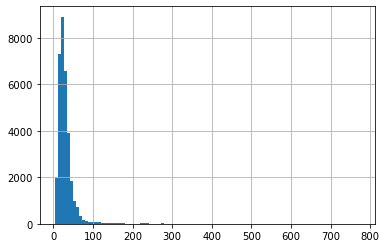

In [34]:
df["len_encoded"].hist(bins = 100)

<AxesSubplot:>

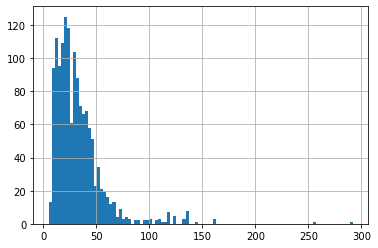

In [35]:
test["len_encoded"].hist(bins=100)

In [29]:
test.loc[test["len_encoded"] == 292, "description"]

914    100% vegetable wax scented candle with two wic...
Name: description, dtype: object

In [36]:
df.loc[df["len_encoded"] >= 300, "description"].shape

(32,)

In [47]:
[text for text in test["description"].tolist() if "contains" in text]

['A deep and complex fragrance illuminated by bergamot and ylang-ylang and the sensual notes of sandalwood, transporting you to the exotic East. <BR>Main aromatic notes: BERGAMOT, CLOVE, CARDAMOM, YLANG-YLANG FLOWER, JASMINE, CEDARWOOD, SANDALWOOD.  Liquid hand soap in a transparent container with dispenser. It contains aloe vera and glycerine extracts to help hydrate and soften the skin. Made in the EU.',
 'The ‘Ginger Lily’ is a species of tropical lily originating in India that is not related to the ginger root (except for in name). We took inspiration from this tropical lily to create a captivating floral fragrance that invokes a recently-cut bunch of lilies with an exotic touch of musk and cinnamon notes. Main aromatic notes: LILY, HELIOTROPE, JASMINE, CINNAMON, MUSK.  Liquid hand soap in a transparent container with dispenser. It contains aloe vera and glycerine extracts to help hydrate and soften the skin. Made in the EU.',
 'The notes of this lively fragrance invite you to ente

In [20]:
test.sort_values(by="len_encoded", ascending=False).reset_index(drop=True).loc[0, "description"]

'100% vegetable wax scented candle with two wicks. Comes in a cylindrical glass tumbler.Sweet and romantic or fresh and wild. This versatile fragrance changes depending on the time of day you happen to be enjoying it. Don’t let its name fool you, there is no trace of ginger in its notes. It has a lily base and exotic touches of musk and cinnamon. Main aromatic notes: LILY, LILY OF THE VALLEY, HELIOTROPE, JASMINE, CINNAMON, MUSK. Lasts approximately: 80 hours.INSTRUCTIONS FOR USE:- Always place the candle on heat-resistant surfaces away from heaters or other hot surfaces.- Do not light the candle in rooms with children or pets.- Always keep the lit candle in a vertical position so that the wax burns evenly. When you snuff it out, allow the wax to cool before using it again.- Keep the wick cut to 6 mm above the wax for optimum burning.- Keep the wax clear of residue.- Always keep the candle away from curtains, ventilation and air vents. If you use more than one candle at a time, leave a 

In [23]:
zara = pd.read_csv("../zara_data/zara_total6.csv")

In [24]:
'Black laceless sneakers made of technical fabric. The upper is cut from a single piece. Sock-style design. Contrast red pull tab on the heels. Red interior. White chunky soles.' in zara["description"]

False

In [68]:
"SOCK-STYLE SNEAKERS" in zara["name"]

False

In [103]:
df.sort_values(by="len_encoded", ascending=False).reset_index(drop=True).loc[25000, "description"]

'High waist culottes with elastic waist and wide leg. Featuring contrast trims.'

In [52]:
df.sort_values(by="len_encoded", ascending=False).reset_index(drop=True).loc[2, "name"]

'STERLING SILVER CHAIN NECKLACE WITH TAG'

In [9]:
len(encoded_ids)

33613

In [10]:
lens = [len(enc_ids) for enc_ids in encoded_ids]

In [11]:
max(lens)

863

In [12]:
encoded_targets = tokenizer.batch_encode_plus(df["name"].tolist())

In [13]:
encoded_targets_ids = encoded["input_ids"]

In [15]:
max(encoded_targets_ids)

[0,
 48987,
 46482,
 42026,
 4136,
 15155,
 991,
 415,
 19,
 17812,
 32847,
 29,
 4,
 20,
 1468,
 817,
 24,
 32551,
 13319,
 8,
 28126,
 4,
 2]

In [30]:
sum(lens)/len(lens)

36.67164489929492

In [25]:
np.percentile(lens, 99.9)

NameError: name 'lens' is not defined

In [16]:
names = df["name"].tolist()

In [17]:
encoded = tokenizer.batch_encode_plus(names)

In [18]:
encoded_ids = encoded["input_ids"]

In [19]:
lens = [len(enc_ids) for enc_ids in encoded_ids]

In [20]:
max(lens)

52

In [21]:
sum(lens)/len(lens)

11.88659149733734

In [23]:
min(lens)

3